# MAVEN MOVIES DATABASE - ANALYTICS USING SQL AND PYTHON3

#### The Database is in MySql and I'll be using MySql connector to query the Database , I'll also try to create visualizations regarding the queried data , which help in informed decision making 

In [1]:
import mysql.connector
from tabulate import tabulate
import pandas as pd
import seaborn as sns

#### Connecting to Database and Password has been removed for privacy purposes

In [2]:
mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="!harshcutyi1A"
)
mycursor = mydb.cursor()

#### A small helper fucntio which takes in queries and returns a Pandas DataFrame

In [121]:
def helperfunc(query):
    mycursor.execute(query)
    myresult = mycursor.fetchall()
    df_query = pd.DataFrame(myresult)
    column_names = [i[0] for i in mycursor.description]
    df_query.columns = column_names
    return df_query

# 1. We will need a count of active customers for each of your stores. Separately, please. 

In [122]:
query = """
SELECT COUNT(customer_id) AS no_of_active_customer, store_id
FROM customer
WHERE active = '%d'
GROUP BY store_id
 
""" % (1)
df = helperfunc(query)
df

,no_of_active_customer,store_id
0,318,1
1,266,2


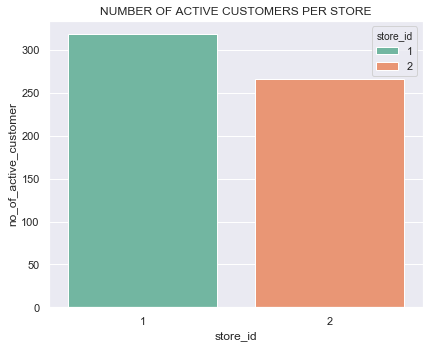

In [124]:
sns.set(rc={'figure.figsize':(6.7,5.27)})
ax = sns.barplot(x="store_id", y="no_of_active_customer",hue="store_id",dodge = False ,palette="Set2",
                 data=df).set_title('NUMBER OF ACTIVE CUSTOMERS PER STORE')

## Number of Distinct Films Per Category 

In [76]:
query = """
SELECT count(DISTINCT(t1.film_id)) AS no_of_distinct_films ,t2.category_id , t2.name
FROM film_category AS t1
INNER JOIN category AS t2 ON
     t1.category_id = t2.category_id
GROUP BY t1.category_id;
"""


,no_of_distinct_films,category_id,name
0,64,1,Action
1,66,2,Animation
2,60,3,Children
3,57,4,Classics
4,58,5,Comedy
5,68,6,Documentary
6,62,7,Drama
7,69,8,Family
8,73,9,Foreign
9,61,10,Games


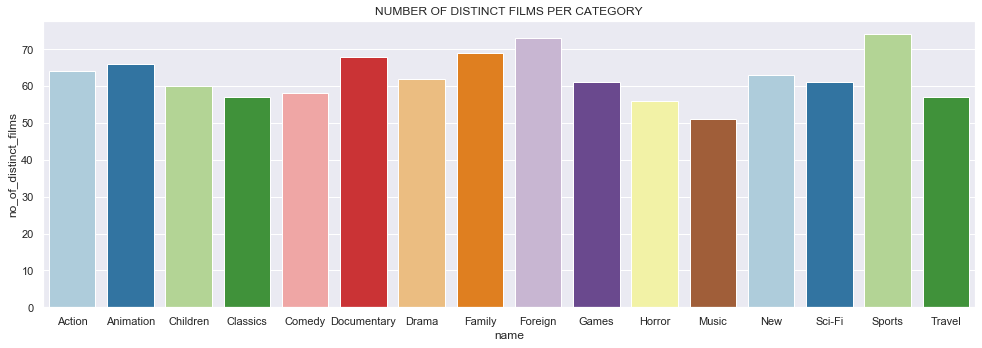

In [85]:
sns.set(rc={'figure.figsize':(16.7,5.27)})
ax = sns.barplot(x="name", y="no_of_distinct_films" ,dodge = False,palette="Paired",
                 data=df_query6).set_title('NUMBER OF DISTINCT FILMS PER CATEGORY')

In [86]:
sns.set(rc={'figure.figsize':(8.7,5.27)})


## 6.	We would like to understand the replacement cost of your films. Please provide the replacement cost for the film that is least expensive to replace, the most expensive to replace, and the average of all films you carry. ``

In [87]:
query = """
SELECT MIN(replacement_cost), MAX(replacement_cost) , AVG(replacement_cost)
FROM film;
"""

mycursor.execute(query)

myresult = mycursor.fetchall()
df_query6 = pd.DataFrame(myresult)

column_names = [i[0] for i in mycursor.description]

df_query6.columns = column_names

In [88]:
df_query6

,MIN(replacement_cost),MAX(replacement_cost),AVG(replacement_cost)
0,9.99,29.99,19.984000


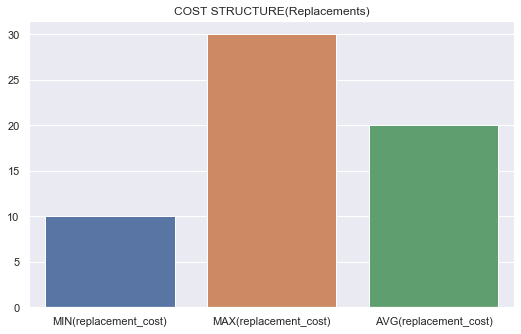

In [105]:
ax = sns.barplot(x=list(df_query6.columns), y=list(df_query6.iloc[0])).set_title('COST STRUCTURE(Replacements)')

## 7.	We are interested in having you put payment monitoring systems and maximum payment processing restrictions in place in order to minimize the future risk of fraud by your staff.Please provide the average payment you process, as well as the maximum payment you have processed.

In [106]:
query = """
SELECT MAX(amount) AS max_payment, AVG(amount) AS avg_payment
FROM payment;
"""

mycursor.execute(query)

myresult = mycursor.fetchall()
df_query7 = pd.DataFrame(myresult)

column_names = [i[0] for i in mycursor.description]

df_query7.columns = column_names

In [107]:
df_query7

,max_payment,avg_payment
0,11.99,4.200667


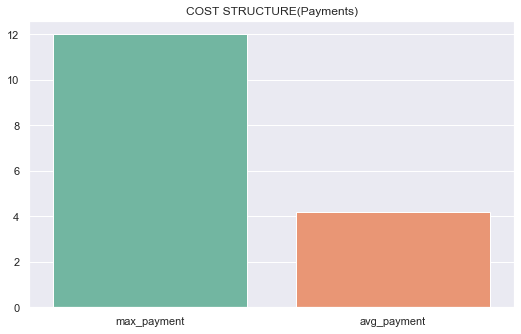

In [110]:
ax = sns.barplot(x=list(df_query7.columns), y=list(df_query7.iloc[0]),palette="Set2").set_title('COST STRUCTURE(Payments)')

## 8.	We would like to better understand what your customer base looks like. Please provide a list of all customer identification values, with a count of rentals they have made all-time, with your highest volume customers at the top of the list.

In [113]:
query = """
SELECT customer_id , COUNT(rental_id) AS no_of_rentals
FROM payment
group by customer_id
ORDER BY  no_of_rentals DESC
LIMIT 10;"""

mycursor.execute(query)

myresult = mycursor.fetchall()
df_query7 = pd.DataFrame(myresult)

column_names = [i[0] for i in mycursor.description]

df_query7.columns = column_names

In [114]:
df_query7

,customer_id,no_of_rentals
0,148,46
1,526,45
2,144,42
3,236,42
4,75,41
5,197,40
6,469,40
7,178,39
8,468,39
9,137,39


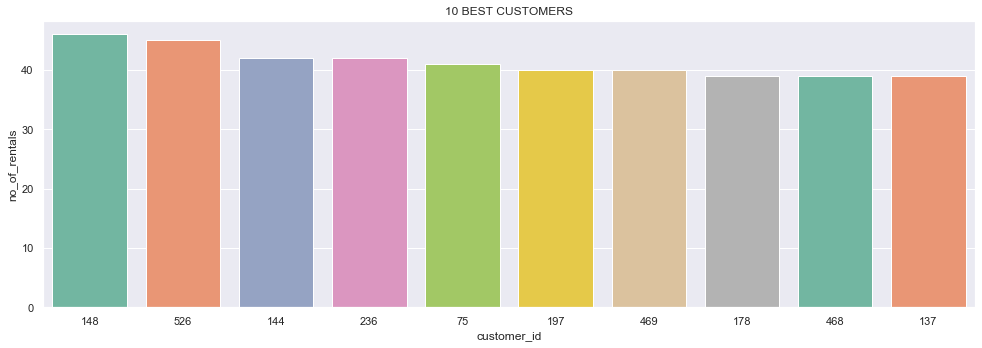

In [127]:
sns.set(rc={'figure.figsize':(16.7,5.27)})
ax = sns.barplot(x="customer_id", y="no_of_rentals" ,dodge = False,palette="Set2",order = list(df_query7['customer_id']),
                 data=df_query7).set_title('10 BEST CUSTOMERS')

## 9. My partner and I want to come by each of the stores in person and meet the managers. Please send over the managers’ names at each store, with the full address of each property (street address, district, city, and country please).  

In [48]:
query = """
SELECT 
    t2.first_name, 
    t2.last_name ,
    t3.address,
    t3.district,
    t4.city,
    t5.country
FROM 
    store AS t1

INNER JOIN  
    staff AS t2 
          ON t1.store_id = t2.store_id

INNER JOIN
    address AS t3
            ON  t1.address_id = t3.address_id
        
INNER JOIN
    city as t4
        ON t3.city_id = t4.city_id

INNER JOIN
    country AS t5
        ON t4.country_id = t5.country_id;
"""

mycursor.execute(query)

myresult = mycursor.fetchall()
df_query9 = pd.DataFrame(myresult)

column_names = [i[0] for i in mycursor.description]

df_query9.columns = column_names

In [49]:
df_query9

,first_name,last_name,address,district,city,country
0,Mike,Hillyer,47 MySakila Drive,Alberta,Lethbridge,Canada
1,Jon,Stephens,28 MySQL Boulevard,QLD,Woodridge,Australia


## 10. I would like to get a better understanding of all of the inventory that would come along with the business. Please pull together a list of each inventory item you have stocked, including the store_id number, the inventory_id, the name of the film, the film’s rating, its rental rate and replacement cost. 

In [50]:
query = """
SELECT 
	t1.store_id,
    t1.inventory_id,
    t2.title,
    t2.rating,
    t2.rental_rate,
    t2.replacement_cost
FROM 
	inventory AS t1
INNER JOIN 
	film AS t2 
		ON t1.film_id = t2.film_id;
"""

mycursor.execute(query)

myresult = mycursor.fetchall()
df_query10 = pd.DataFrame(myresult)

column_names = [i[0] for i in mycursor.description]

df_query10.columns = column_names

In [51]:
df_query10

,store_id,inventory_id,title,rating,rental_rate,replacement_cost
0,1,1,ACADEMY DINOSAUR,PG,0.99,20.99
1,1,2,ACADEMY DINOSAUR,PG,0.99,20.99
2,1,3,ACADEMY DINOSAUR,PG,0.99,20.99
3,1,4,ACADEMY DINOSAUR,PG,0.99,20.99
4,2,5,ACADEMY DINOSAUR,PG,0.99,20.99
...,...,...,...,...,...,...
4576,1,4577,ZORRO ARK,NC-17,4.99,18.99
4577,2,4578,ZORRO ARK,NC-17,4.99,18.99
4578,2,4579,ZORRO ARK,NC-17,4.99,18.99
4579,2,4580,ZORRO ARK,NC-17,4.99,18.99


## 11. From the same list of films you just pulled, please roll that data up and provide a summary level overview of your inventory. We would like to know how many inventory items you have with each rating at each store. 

In [53]:
query = """
SELECT 
	t1.store_id,
    COUNT(t1.inventory_id) AS inventory,
    t2.rating
FROM 
	inventory AS t1
INNER JOIN 
	film AS t2 
		ON t1.film_id = t2.film_id
GROUP BY store_id,t2.rating
"""

mycursor.execute(query)

myresult = mycursor.fetchall()
df_query11 = pd.DataFrame(myresult)

column_names = [i[0] for i in mycursor.description]

df_query11.columns = column_names
df_query11

,store_id,inventory,rating
0,1,394,G
1,1,444,PG
2,1,525,PG-13
3,1,442,R
4,1,465,NC-17
5,2,397,G
6,2,480,PG
7,2,493,PG-13
8,2,462,R
9,2,479,NC-17


## 12.Similarly, we want to understand how diversified the inventory is in terms of replacement cost. We want to see how big of a hit it would be if a certain category of film became unpopular at a certain store.We would like to see the number of films, as well as the average replacement cost, and total replacement cost, sliced by store and film category. 


In [54]:
query = """
SELECT 
    t2.store_id,
    t4.name,
	AVG(t1.replacement_cost),
    SUM(t1.replacement_cost),
    COUNT(t1.film_id)
FROM 
	film AS t1
INNER JOIN 
	inventory AS t2
		ON t2.film_id = t1.film_id
INNER JOIN 
	film_category AS t3
		ON t3.film_id = t1.film_id
INNER JOIN
	category AS t4
		ON t3.category_id = t4.category_id
GROUP BY
	t2.store_id, t3.category_id;
"""

mycursor.execute(query)

myresult = mycursor.fetchall()
df_query12 = pd.DataFrame(myresult)

column_names = [i[0] for i in mycursor.description]

df_query12.columns = column_names
df_query12

,store_id,name,AVG(t1.replacement_cost),SUM(t1.replacement_cost),COUNT(t1.film_id)
0,1,Action,21.191183,3581.31,169
1,1,Animation,20.387516,3282.39,161
2,1,Children,19.990000,2578.71,129
3,1,Classics,20.615954,2700.69,131
4,1,Comedy,19.440704,2760.58,142
5,1,Documentary,20.728462,2694.70,130
6,1,Drama,21.934444,3553.38,162
7,1,Family,20.537771,3224.43,157
8,1,Foreign,18.558627,2839.47,153
9,1,Games,21.130625,2704.72,128
